# 1. 필요한 패키지를 가져옵니다.

In [2]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 2. 그래프를 그리기 위해 임의의 데이터를 만들어 줍니다.

In [3]:
import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data

array([ -47,  -15,   56,   93,  182,  244,  230,  185,   91,   35,   43,
        -40, -131,  -72,  -77, -144, -206, -251, -174,  -88, -133, -186,
       -160, -114, -170, -161, -229, -194, -174, -237, -334, -430, -435,
       -529, -438, -361, -338, -332, -373, -370, -306, -216, -307, -236,
       -260, -338, -401, -450, -364, -315], dtype=int32)

# 3. 기본 폰트로 지정 되었기 때문에 한글이 깨져 나옵니다.

Text(0.5, 0, '시간(분)')

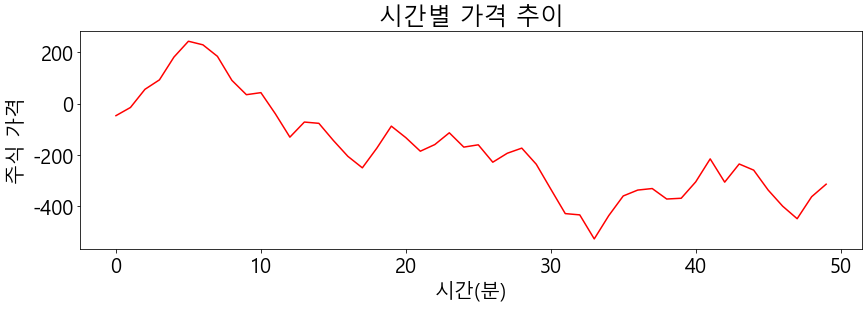

In [28]:
plt.plot(range(50), data, 'r')
mpl.rcParams['axes.unicode_minus'] = False
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')

# 4. 폰트를 설정해 주기에 앞서 설치 된 matplotlib 의 버전과 위치정보를 가져옵니다.

In [7]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.2.2
설치 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\User\.matplotlib
캐시 위치:  C:\Users\User\.matplotlib


# 5. matplotlib의 위치정보를 알았으니 터미널을 이용해 해당 위치로 가봅니다.

In [29]:
print ('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


# 6. 설치 된 폰트를 찍어 봅니다.

In [30]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

167


In [10]:
# OSX 의 설치 된 폰트를 가져오는 함수
font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))

0


<ipython-input-10-51a6c54cc9e0>:2: MatplotlibDeprecationWarning: 
The OSXInstalledFonts function was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  font_list_mac = fm.OSXInstalledFonts()


In [11]:
# 시스템 폰트에서 읽어온 리스트에서 상위 10개만 출력
font_list[:10] 

['C:\\Windows\\Fonts\\gadugi.ttf',
 'C:\\Windows\\Fonts\\segoeuiz.ttf',
 'C:\\Windows\\Fonts\\HANDotumExt.ttf',
 'C:\\Windows\\Fonts\\NirmalaS.ttf',
 'C:\\Windows\\Fonts\\segoeuisl.ttf',
 'C:\\Windows\\Fonts\\LeelUIsl.ttf',
 'C:\\Windows\\Fonts\\HANBatangExtB.ttf',
 'C:\\Windows\\Fonts\\LeelaUIb.ttf',
 'C:\\Windows\\Fonts\\verdana.ttf',
 'C:\\Windows\\Fonts\\msgothic.ttc']

In [12]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트명 만 출력
f[:10]

167


['cmsy10',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'DejaVu Sans']

# 7. 나눔고딕을 사용할 예정이기 때문에 이름에 ‘Nanum’이 들어간 폰트만 가져와 봅니다.
- 폰트를 설치했는데 원하는 폰트명을 가져오지 못 할때, 터미널을 열어 mpl.get_cachedir()로 찍히는 캐시위치로 이동해서 캐시파일을 열어봅니다.
- 캐시파일에 원하는 폰트리스트가 없으면 주피터 노트북 혹은 콘다를 재실행 해줍니다.

In [13]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]

# 9. 폰트를 사용하는 방법은 3가지가 있습니다.
- FontProperties 를 사용하는 방법 - 그래프의 폰트가 필요한 항목마다 지정해 주어야 합니다.
- matplotlib.rcParams[]으로 전역글꼴 설정 방법 - 그래프에 설정을 해주면 폰트가 필요한 항목에 적용 됩니다.
- 2)번의 방법을 mpl.matplotlib_fname()로 읽어지는 설정 파일에 직접 적어주는 방법, 단 모든 노트북에 적용됩니다. 노트북을 열 때마다 지정해 주지 않아도 돼서 편리합니다.

#### 1) FontProperties 를 사용하는 방법
- 텍스트를 지정하는 항목에 지정해 사용할 수 있습니다. 지정해 준 항목에만 해당 폰트가 적용 됩니다.
- matplotlib.pyplot
    -title()
    -xlabel()
    -ylabel()
    -legend()
    -text()
- matplotlib.axes
    -set_title()

In [26]:
# fname 옵션을 사용하는 방법
path = '/Library/Fonts/NanumBarunpenRegular.otf'
fontprop = fm.FontProperties(fname=path, size=18)

plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이', fontproperties=fontprop)
plt.ylabel('주식 가격', fontproperties=fontprop)
plt.xlabel('시간(분)', fontproperties=fontprop)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Library/Fonts/NanumBarunpenRegular.otf'

<Figure size 1008x288 with 1 Axes>

### 2) matplotlib.rcParams[]으로 전역글꼴 설정 방법

In [15]:
# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['sans-serif']


In [16]:
# serif, sans-serif, monospace
print('serif 세리프가 있는 폰트--------')
print (plt.rcParams['font.serif']) 
print('sans-serif 세리프가 없는 폰트 --------')
print (plt.rcParams['font.sans-serif']) 
print('monospace 고정폭 글꼴--------')
print (plt.rcParams['font.monospace']) 

serif 세리프가 있는 폰트--------
['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
sans-serif 세리프가 없는 폰트 --------
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
monospace 고정폭 글꼴--------
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


In [17]:
plt.rcParams["font.family"] = 'Nanum Brush Script OTF'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14,4)

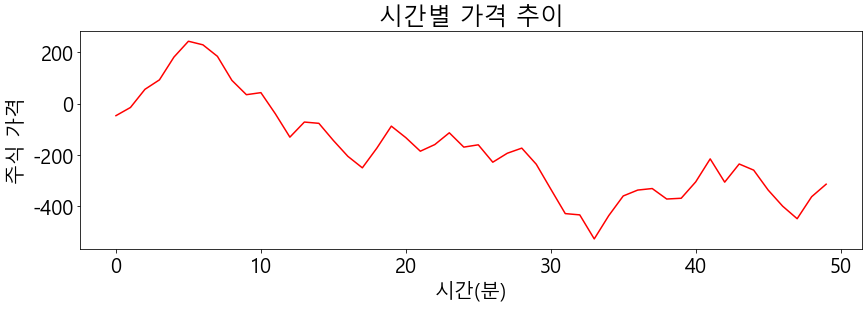

In [31]:
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

### rcParams 대신 FontProperties 와 plt.rc 를 사용하는 방법

In [35]:
path = '/Library/Fonts/NanumBarunGothic.ttf' # 주소 변경 필요
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

fig, ax = plt.subplots()
ax.plot(data)
ax.set_title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('ggplot')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Library/Fonts/NanumBarunGothic.ttf'

### 3) rcParams 를 설정파일에 직접 적어주는 방법 - 모든 노트북에 공통적용
- font.family : NanumGothicOTF
- 이 외에 자주 사용하는 설정도 함께 해주면 편리합니다.
- 이곳에 폰트를 지정해 주면 노트북을 실행할 때 바로 로드되도록 설정할 수 있습니다.

In [20]:
print ('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


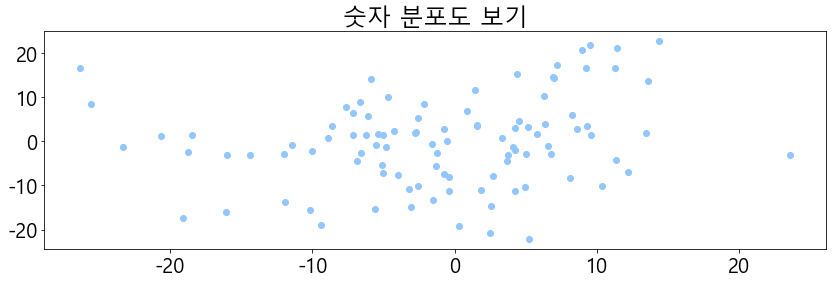

In [32]:
# import matplotlib.pyplot as plt
# import numpy as np

fig, ax = plt.subplots()
ax.plot(10*np.random.randn(100), 10*np.random.randn(100), 'o')
ax.set_title('숫자 분포도 보기')
plt.show()

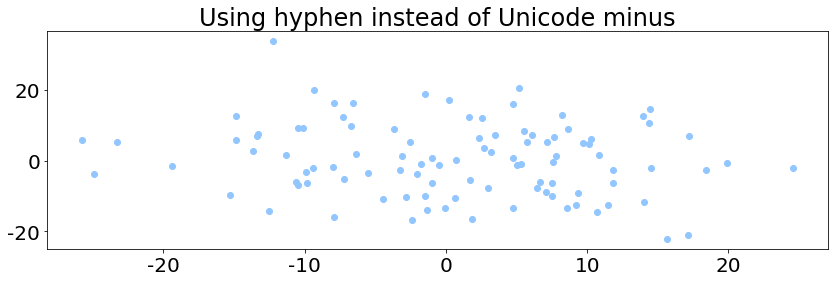

In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(10*np.random.randn(100), 10*np.random.randn(100), 'o')
ax.set_title('Using hyphen instead of Unicode minus')
plt.show()

In [34]:
# 설치된 한글 폰트 출력

import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmsy10',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'cmex10',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'STIXSizeTwoSym',
 'cmss10',
 'cmmi10',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'cmr10',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'cmtt10',
 'DejaVu Sans',
 'STIXGeneral',
 'cmb10',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'Corbel',
 'Segoe Print',
 'Arial',
 'MGungHeulim',
 'Corbel',
 'Segoe Print',
 'Segoe Script',
 'Palatino Linotype',
 'Candara',
 'Comic Sans MS',
 'Segoe UI',
 'Leelawadee UI',
 'Segoe UI',
 'Corbel',
 'Constantia',
 'HCR Dotum',
 'Ink Free',
 'Segoe UI',
 'Trebuchet MS',
 'Nirmala UI',
 'Constantia',
 'Segoe UI',
 'Calibri',
 'Arial',
 

In [ ]:
plt.rcParams['font.family'] = 'Malgun Gothic' 

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'